## ResNet50 Car Sides - Keras

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input
from skimage import data, io, filters

/Users/hardikthaker/.virtualenvs/cv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
batch_size=16

In [9]:
train_data_dir = "/Users/hardikthaker/deep_learning/Cars_Data/cars_task_data/train"
validation_data_dir = "/Users/hardikthaker/deep_learning/Cars_Data/cars_task_data/validation"

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(validation_data_dir, shuffle=False, batch_size=batch_size)

Found 8633 images belonging to 4 classes.
Found 799 images belonging to 4 classes.


In [7]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
predictions = Dense(4, activation='sigmoid')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=4,
        validation_data=validation_generator)

Epoch 1/1
539/539 [==============================] - 4434s 8s/step - loss: 0.4499 - acc: 0.7773 - val_loss: 0.3343 - val_acc: 0.8223
CPU times: user 4h 4min 43s, sys: 11min 15s, total: 4h 15min 58s
Wall time: 1h 13min 54s


In [15]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,shuffle=True,batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(validation_data_dir, shuffle=True, batch_size=batch_size)

Found 8633 images belonging to 4 classes.
Found 799 images belonging to 4 classes.


In [17]:
K.set_value(model.optimizer.lr, 0.0001)

In [18]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=4,
        validation_data=validation_generator)

Epoch 1/1
539/539 [==============================] - 4144s 8s/step - loss: 0.2705 - acc: 0.8929 - val_loss: 0.3155 - val_acc: 0.8448
CPU times: user 4h 3min 40s, sys: 10min 19s, total: 4h 13min 59s
Wall time: 1h 9min 3s


## Test Accuracy

In [19]:
test_data_dir = "/Users/hardikthaker/deep_learning/Cars_Data/cars_task_data/test"

In [20]:
test_generator = test_datagen.flow_from_directory(test_data_dir, shuffle=False, batch_size=batch_size)

Found 568 images belonging to 4 classes.


In [22]:
scores = model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=4, 
                                 use_multiprocessing=False, verbose=0)


In [34]:
print(scores.argmax(1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 2 3 2 2
 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3
 3 2 3 2 2 2 3 2 3 2 2 3 3 3 3 3 2 2 3 2 3 3 2 3 2 3 3 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 2 3 2 2 2 2 2 2 3 2 2 3 2 3 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3
 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 3 2 3 2 3 3 3 2 2 2 2 2 3 3 3
 3 3 2 3 3 2 2 2 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 2 2 3 3 2 3 3 2 3 3 3 

In [36]:
predicted = scores.argmax(1)

In [40]:
final_predicted = [x+1 for x in predicted]

In [41]:
print(final_predicted)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 

In [54]:
#function to load data

def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".jpg")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

In [55]:
test_images, test_labels = load_data(test_data_dir)

In [39]:
print(test_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [43]:
# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, final_predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.850


## Extra

In [44]:
set(test_labels).intersection(final_predicted)

{1, 2, 3, 4}

In [53]:
incorrect=[]
index=0
for x,y in zip(test_labels,final_predicted):
    index=index+1
    if x != y:
        incorrect.append(index)
        print(index)
        

36
292
294
297
301
312
315
325
333
334
336
340
342
345
346
347
348
349
352
354
355
357
359
360
373
374
376
383
386
388
389
399
407
413
414
424
425
426
427
428
429
431
433
437
438
439
440
441
447
450
451
452
453
461
480
483
484
487
490
508
509
510
511
512
513
514
515
516
517
518
519
523
526
527
530
537
538
540
545
547
550
552
554
559
566


In [68]:
incorrect[1:10]

[292, 294, 297, 301, 312, 315, 325, 333, 334]

In [79]:
plt.imshow(test_images[315])

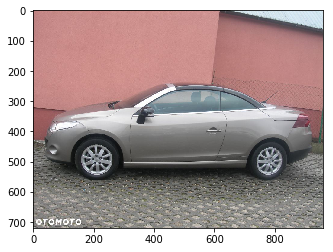

In [80]:
plt.show()

In [78]:
final_predicted[315]

3